This Notebook Corresponds with the VAIL Day 17 Activity

In [1]:
#making imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Network import Network
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#reading our house price data csv into a dataframe
house_info_df = pd.read_csv('housepricedata.csv')

In [3]:
#creating dataframe of the Y Data
Y_data = house_info_df['AboveMedianPrice']

#make a temp dataframe to hold X values
X_data = house_info_df.iloc[:, 0:10]

#standardizing values in X_Data dataframe
X_data_normalized = (X_data-X_data.mean())/X_data.std()

#converting x/y dataframes into np arrays for model to processs
x_data =  X_data_normalized.to_numpy()
y_data = Y_data.to_numpy().reshape(Y_data.to_numpy().shape[0],-1)

#parsing 70% train and 30% test
parse_index = round(x_data.shape[0]*0.7)

x_train , x_test = x_data[0:parse_index,:], x_data[parse_index:,:]
y_train , y_test = y_data[0:parse_index,:], y_data[parse_index:,:]

Epoch #: 1 | Latest Error" 0.16391643622419358
Epoch #: 2 | Latest Error" 0.3217435899731755
Epoch #: 3 | Latest Error" 0.0006126325020856773
Epoch #: 4 | Latest Error" 0.052703966777690715
Epoch #: 5 | Latest Error" 0.4110344556777858
Epoch #: 6 | Latest Error" 0.296636558455801
Epoch #: 7 | Latest Error" 0.11869591980769836
Epoch #: 8 | Latest Error" 0.008959991870673725
Epoch #: 9 | Latest Error" 0.10096902502841665
Epoch #: 10 | Latest Error" 0.0949570116946917
Epoch #: 11 | Latest Error" 0.0019625371578443768
Epoch #: 12 | Latest Error" 0.001002426704947896
Epoch #: 13 | Latest Error" 1.2995319235371334
Epoch #: 14 | Latest Error" 0.4434010838511949
Epoch #: 15 | Latest Error" 0.012542483974178223
Epoch #: 16 | Latest Error" 2.8027449853135527
Epoch #: 17 | Latest Error" 0.0318391745625247
Epoch #: 18 | Latest Error" 0.11974112380477799
Epoch #: 19 | Latest Error" 0.000839900484840841
Epoch #: 20 | Latest Error" 0.08024174786910472
Epoch #: 21 | Latest Error" 0.013625754009957025


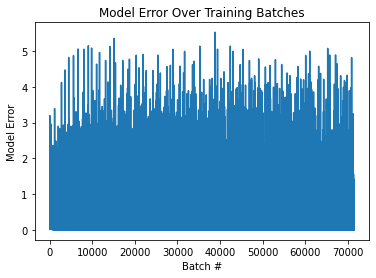

In [4]:
# creating the model

model = Network('log-loss', x_train, y_train, x_test, y_test, x_features=10, epoch_num=70,
                layer_num=3, layer_depths=[32, 32, 1], batch_num=round(x_train.shape[0]), learn_rate=0.001)

#adding layers
model.add_Layer('relu', 'initial_hidden')
model.add_Layer('relu', 'hidden')

# adding output layer
model.add_Layer('sigmoid', 'output')


# training model
model.train()

# plotting model error while training
model.plot_train_error()

# printing model predictions for some test samples
model.test_binary_classification()

### Notes
 * Log Loss Cost Function + Full Stochastic Gradient Descent + 70 Epochs + learn_rate=0.001 yielded ~90% accuracy

In [5]:
#testing homebrew model against a pre-build m MLP Model from SKL

from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=32, epochs=100)

model.evaluate(x_test, y_test)[1]

Epoch 1/100
32/32 [==============================] - 1s 948us/step - loss: 0.7252 - accuracy: 0.4901
Epoch 2/100
32/32 [==============================] - 0s 950us/step - loss: 0.6439 - accuracy: 0.5908
Epoch 3/100
32/32 [==============================] - 0s 948us/step - loss: 0.5832 - accuracy: 0.7259
Epoch 4/100
32/32 [==============================] - 0s 986us/step - loss: 0.5448 - accuracy: 0.7770
Epoch 5/100
32/32 [==============================] - 0s 986us/step - loss: 0.4892 - accuracy: 0.8578
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.8590

0.8835616707801819

### Notes
 *SKL Model also reaches around 90% accuracy on this dataset.
